# Connect to GDrive and set working directory
## !! Skip if you run in local !!
1. Add a shortcut for working directory('IDPCode') to your drive as depicted below:
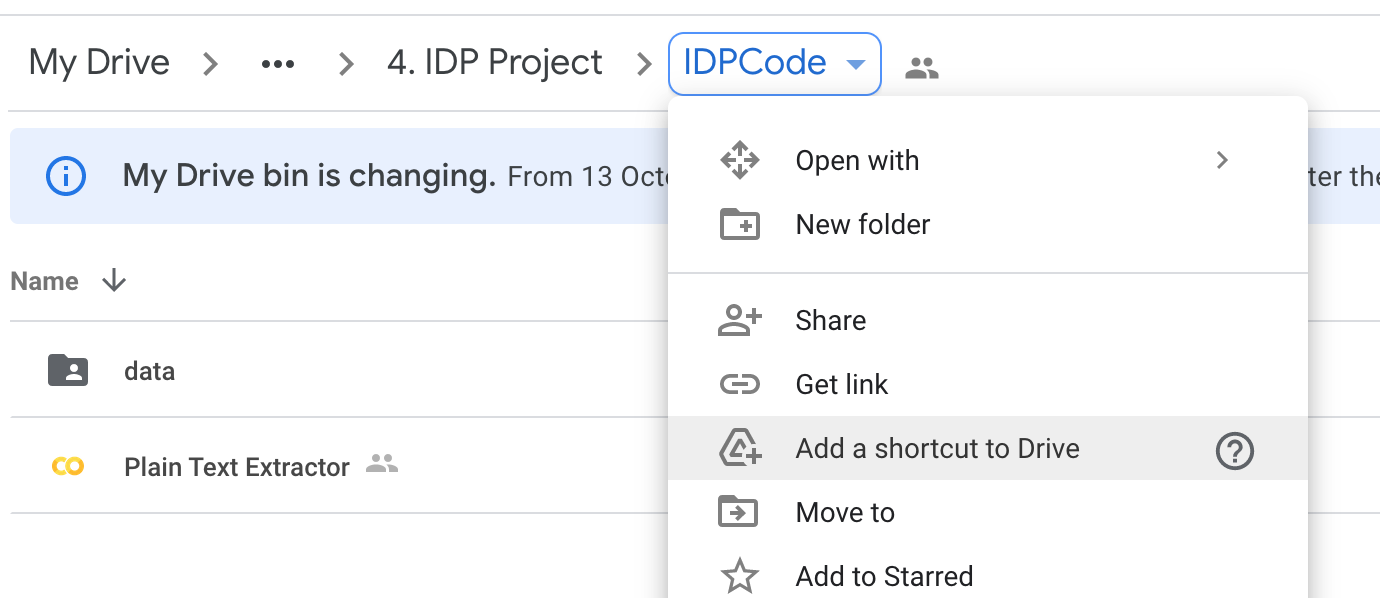
2. Run the command below to connect the GDrive:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/IDPCode/

# Start from here if you run in local !!

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# show execution time of cells
%load_ext autotime

# CHANGE PATH FOR THE DATASET FOLDER
DATA_DIRECTORY='/Users/farukcankaya/Google Drive/AllPapers'

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 23.9 ms


In [ ]:
def get_file_name(file_path):
  f = os.path.basename(file_path)
  return f.replace('.pdf', '')

time: 1.76 ms


# Read data
The columns that start with 'content' contain only first 3 pages!

In [ ]:
# dt = Dataset Tika
dt = pd.read_excel('All_Papers_In_Plain_Text_TIKA_full_pre_processed_all_cols.xlsx')

time: 9.86 s


In [ ]:
# Relevant Data that is provided by supervisor
rt = pd.read_excel('/Users/farukcankaya/Google Drive/DATA_RELEVANT.xlsx')

time: 9.84 s


In [ ]:
dt.columns

Index(['Unnamed: 0', 'file_path', 'total_page_count', 'content',
       'clean_content', 'content_stop_words', 'content_stemmed'],
      dtype='object')

time: 3.47 ms


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15751 entries, 0 to 15750
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          15751 non-null  int64 
 1   file_path           15751 non-null  object
 2   total_page_count    15751 non-null  int64 
 3   content             15751 non-null  object
 4   clean_content       15751 non-null  object
 5   content_stop_words  15660 non-null  object
 6   content_stemmed     15660 non-null  object
dtypes: int64(2), object(5)
memory usage: 861.5+ KB
time: 31.7 ms


## Check nan values

In [ ]:
dt.isna().sum()

Unnamed: 0             0
file_path              0
total_page_count       0
content                0
clean_content          0
content_stop_words    91
content_stemmed       91
dtype: int64

time: 23.3 ms


In [ ]:
fe_index = []
fe_file = []
for i in range(0, len(dt['content_stop_words'])):
  try:
    len(dt['content_stop_words'][i])
  except:
    fe_index.append(i)
    fe_file.append(get_file_name(dt['file_path'][i]))
print(fe_index)


[817, 858, 944, 1092, 1100, 1124, 1151, 1192, 1203, 1212, 1282, 1360, 1374, 1412, 1432, 1543, 1544, 1729, 1791, 11663, 11690, 11731, 11739, 11741, 11770, 11785, 11852, 11862, 11864, 11957, 12045, 12048, 12110, 12115, 12194, 12219, 12227, 12310, 12320, 12329, 12455, 12526, 12569, 12592, 12614, 12632, 12643, 12657, 12705, 12706, 12769, 12777, 12810, 12811, 12817, 12883, 13037, 14806, 14812, 14816, 14872, 14881, 14908, 14994, 15065, 15067, 15069, 15130, 15165, 15184, 15242, 15246, 15251, 15283, 15285, 15353, 15370, 15371, 15411, 15435, 15438, 15540, 15549, 15583, 15585, 15605, 15630, 15636, 15689, 15719, 15721]
time: 136 ms


In [ ]:
for f in fe_file:
  print(f+ " = "+str(rt['Filename'].str.contains(f).any()))

118_BAR = False
119_BAR = False
124_BAR = False
120_BAR = False
509_BAR = False
510_BAR = False
116_BAR = False
117_BAR = False
121_BAR = False
508_BAR = False
123_BAR = False
512_BAR = False
114_BAR = False
1_JAPP = True
425_JAPP = False
301_JAPP = True
167_JAPP = True
587_JAPP = True
532_JAPP = False
77_AOS = True
112_MAJ = False
92_MAJ = True
170_MAJ = True
184_MAJ = True
14_MAJ = True
1123_MAJ = False
124_MAJ = False
168_MAJ = False
178_MAJ = True
113_MAJ = False
118_MAJ = False
108_MAJ = False
155_MAJ = True
173_MAJ = True
187_MAJ = True
90_MAJ = True
204_MAJ = False
42_MAJ = True
1121_MAJ = False
89_MAJ = True
158_MAJ = True
115_MAJ = False
182_MAJ = True
176_MAJ = True
114_MAJ = False
132_MAJ = True
79_MAJ = True
150_MAJ = True
34_MAJ = True
1125_MAJ = False
174_MAJ = True
86_MAJ = True
142_MAJ = False
152_MAJ = True
130_MAJ = True
143_MAJ = False
87_MAJ = True
888_AAAJ = False
912_AAAJ = False
853_AAAJ = False
859_AAAJ = True
918_AAAJ = False
867_AAAJ = False
894_AAAJ = False
8

## It seems that we are not able to convert some of the documents correctly.
We have some documents that are converted as Nan but they are take place in RELEVANT_DATA document.

In [ ]:
dt_nn = dt.copy()
dt_nn.dropna(subset = ["content_stop_words"], inplace=True)
dt_nn.isna().sum()
dt_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15660 entries, 0 to 15750
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          15660 non-null  int64 
 1   file_path           15660 non-null  object
 2   total_page_count    15660 non-null  int64 
 3   content             15660 non-null  object
 4   clean_content       15660 non-null  object
 5   content_stop_words  15660 non-null  object
 6   content_stemmed     15660 non-null  object
dtypes: int64(2), object(5)
memory usage: 978.8+ KB
time: 53.1 ms


Text(0.5, 0, 'Content character length')

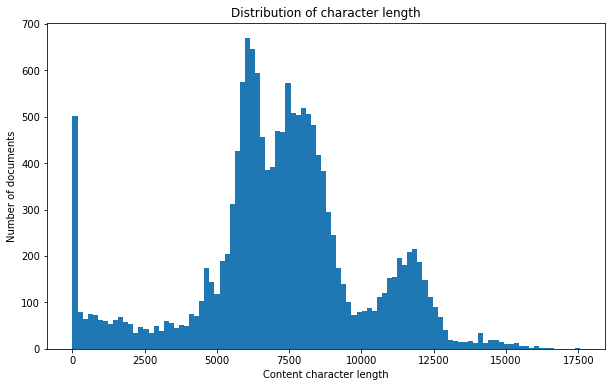

time: 581 ms


In [ ]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in dt_nn['content_stop_words']]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of character length')
plt.ylabel('Number of documents')
plt.xlabel('Content character length')

In [ ]:
dt_nn.info()
dt_nn.reset_index(drop=True, inplace=True)
dt_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15660 entries, 0 to 15750
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          15660 non-null  int64 
 1   file_path           15660 non-null  object
 2   total_page_count    15660 non-null  int64 
 3   content             15660 non-null  object
 4   clean_content       15660 non-null  object
 5   content_stop_words  15660 non-null  object
 6   content_stemmed     15660 non-null  object
dtypes: int64(2), object(5)
memory usage: 978.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15660 entries, 0 to 15659
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          15660 non-null  int64 
 1   file_path           15660 non-null  object
 2   total_page_count    15660 non-null  int64 
 3   content             15660 non-null  object
 4   clean_c

In [ ]:
dt_irr_index = []
for i in range(0, len(dt_nn['file_path'])):
  if not rt['Filename'].str.contains(get_file_name(dt_nn['file_path'][i])).any():
    dt_irr_index.append(i)

time: 1min 28s


In [ ]:
print('# of IRRELEVANT DATA we have: ' + str(len(dt_irr_index)))

# of IRRELEVANT DATA we have: 3767
time: 486 µs


In [ ]:
dt_nn.iloc[dt_irr_index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767 entries, 1 to 15654
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3767 non-null   int64 
 1   file_path           3767 non-null   object
 2   total_page_count    3767 non-null   int64 
 3   content             3767 non-null   object
 4   clean_content       3767 non-null   object
 5   content_stop_words  3767 non-null   object
 6   content_stemmed     3767 non-null   object
dtypes: int64(2), object(5)
memory usage: 235.4+ KB
time: 17.4 ms


In [ ]:
dt_nn.iloc[dt_irr_index].head(2)['file_path']

1    /Users/farukcankaya/Google Drive/AllPapers/8_AH/140_AH.pdf
4    /Users/farukcankaya/Google Drive/AllPapers/8_AH/294_AH.pdf
Name: file_path, dtype: object

time: 5.1 ms


In [ ]:
rt[rt['Filename'] == '141_AH'].head()

,Index,Filename,Journalbez,DOI,Year,Volume,Issue,Page start,Page end,Pages,Language of Original Document,Document Type,Title,Authors,Abstract,Abstract_Length,Author Keywords,References,Link,seite1,seite12,seite123,Page1_Length,FINALE_EINORDNUNG,HISTORY,INFORMATION,TAX,AUDIT,FINANCIAL,PUBLIC,MANAGERIAL,GOVERNANCE,SOCIAL,OTHER,EDUCATION,RESEARCH,manuell


time: 15.1 ms


In [ ]:
# relavent datas
dtr = dt_nn.copy().drop(dt_irr_index)

time: 9.44 ms


In [ ]:
dtr.info()
dtr.reset_index(drop=True, inplace=True)
dtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11893 entries, 0 to 15659
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11893 non-null  int64 
 1   file_path           11893 non-null  object
 2   total_page_count    11893 non-null  int64 
 3   content             11893 non-null  object
 4   clean_content       11893 non-null  object
 5   content_stop_words  11893 non-null  object
 6   content_stemmed     11893 non-null  object
dtypes: int64(2), object(5)
memory usage: 743.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11893 entries, 0 to 11892
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          11893 non-null  int64 
 1   file_path           11893 non-null  object
 2   total_page_count    11893 non-null  int64 
 3   content             11893 non-null  object
 4   clean_c

In [ ]:
dtr.head(2)['file_path']

0    /Users/farukcankaya/Google Drive/AllPapers/8_AH/711_AH.pdf
1    /Users/farukcankaya/Google Drive/AllPapers/8_AH/611_AH.pdf
Name: file_path, dtype: object

time: 3.43 ms


In [ ]:
dtr.to_pickle('Relevant_Papers.pkl')

time: 1.86 s


## Check vice versa

In [ ]:
r_irr_index = []
for i in range(0, len(rt['Filename'])):
  if not dtr['file_path'].str.contains(rt['Filename'][i]).any():
    r_irr_index.append(i)

time: 1min 7s


In [ ]:
print('# of documents that RELEVENT_DATA.xlsx have but we dont: ' + str(len(r_irr_index)))

# of documents that RELEVENT_DATA.xlsx have but we dont: 437
time: 485 µs


In [ ]:
rt.iloc[r_irr_index].head(5)['Filename']

612    859_AAAJ
614    860_AAAJ
616    863_AAAJ
617    864_AAAJ
618    865_AAAJ
Name: Filename, dtype: object

time: 4.87 ms


## Check most occurence words

In [ ]:
words_in_doc = [len(str(d).split(' ')) for d in dt['content_stop_words']]
dt['wc'] = words_in_doc

time: 2.32 s


Text(0.5, 0, 'Word count')

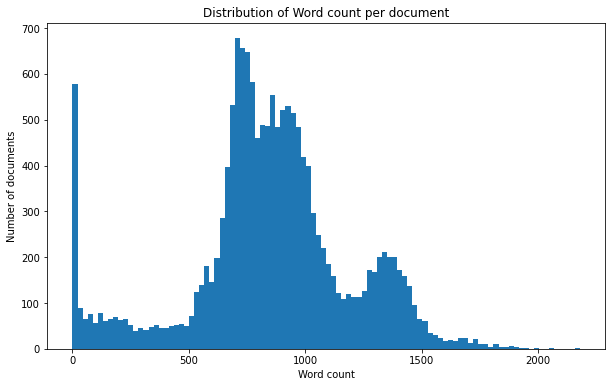

time: 493 ms


In [ ]:
plt.figure(figsize=(10,6))
plt.hist(words_in_doc, bins = 100)
plt.title('Distribution of Word count per document')
plt.ylabel('Number of documents')
plt.xlabel('Word count')

In [ ]:
dt_gt_400 = dt[dt['wc']>400]

time: 7.89 ms


In [ ]:
dt[dt['wc']==10].head(5)

Unnamed: 0  \
1463         1463   
11795       11795   
12058       12058   
12236       12236   
12392       12392   

                                                            file_path  \
1463   /Users/farukcankaya/Google Drive/AllPapers/13_JAPP/80_JAPP.pdf   
11795   /Users/farukcankaya/Google Drive/AllPapers/19_MAJ/179_MAJ.pdf   
12058    /Users/farukcankaya/Google Drive/AllPapers/19_MAJ/98_MAJ.pdf   
12236   /Users/farukcankaya/Google Drive/AllPapers/19_MAJ/110_MAJ.pdf   
12392   /Users/farukcankaya/Google Drive/AllPapers/19_MAJ/123_MAJ.pdf   

       total_page_count  \
1463                  2   
11795                 9   
12058                 9   
12236                10   
12392                13   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

time: 59.8 ms


<ipython-input-161-01d03d497280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_gt_400['wc'] = words_in_doc


Text(0.5, 0, 'Word count')

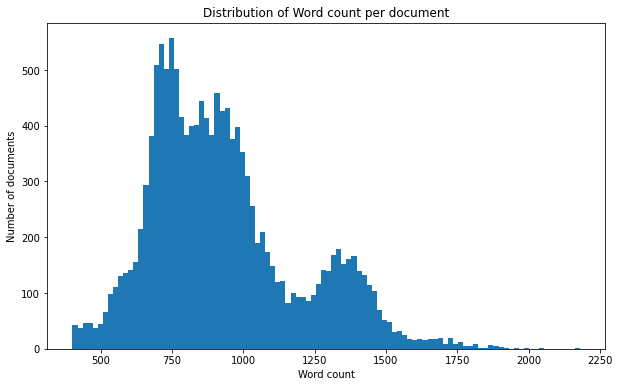

time: 1.44 s


In [ ]:
words_in_doc = [len(str(d).split(' ')) for d in dt_gt_400['content_stop_words']]
dt_gt_400['wc'] = words_in_doc

plt.figure(figsize=(10,6))
plt.hist(words_in_doc, bins = 100)
plt.title('Distribution of Word count per document')
plt.ylabel('Number of documents')
plt.xlabel('Word count')

<ipython-input-162-5ae622a88f30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_normalized['wc'] = words_in_doc


Text(0.5, 0, 'Word count')

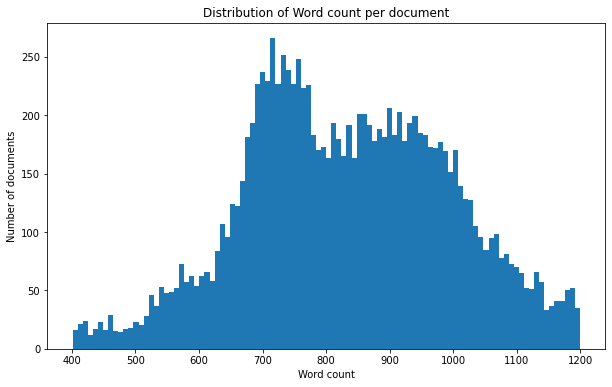

time: 3.19 s


In [ ]:
dt_normalized = dt_gt_400[dt_gt_400['wc'] < 1200]

words_in_doc = [len(str(d).split(' ')) for d in dt_normalized['content_stop_words']]
dt_normalized['wc'] = words_in_doc

plt.figure(figsize=(10,6))
plt.hist(words_in_doc, bins = 100)
plt.title('Distribution of Word count per document')
plt.ylabel('Number of documents')
plt.xlabel('Word count')

In [ ]:
dt_normalized.to_pickle('dt_normalized.pkl')

time: 1.41 s
